In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

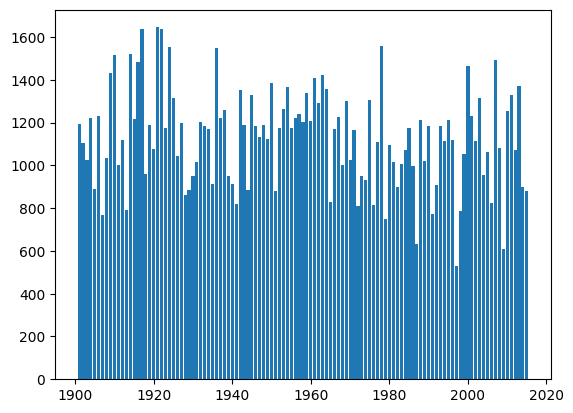

In [3]:
import numpy as np
x=pd.read_csv("E:/Coding/Major/Flood-Prediction-Code/uttarakhand.csv")
y=pd.read_csv("E:/Coding/Major/Flood-Prediction-Code/uttarakhand.csv")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])
plt.bar(y1,x1)
plt.show()

In [4]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if x1[i]>1200:
        flood.append('1')
    else:
        flood.append('0')

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out2.csv")
print((x))
        
        
      




     SUBDIVISION  YEAR    JAN    FEB    MAR   APR   MAY    JUN    JUL    AUG  \
0    UTTARAKHAND  1901  134.5   81.4   44.5   5.9  60.8   33.6  381.1  612.3   
1    UTTARAKHAND  1902    0.0   17.0   52.2  63.7  52.1  113.1  444.1  327.5   
2    UTTARAKHAND  1903   68.0    7.9   87.6  10.3  37.5   83.0  251.6  442.7   
3    UTTARAKHAND  1904   40.0    5.2   78.3  13.6  61.1  180.1  449.6  417.2   
4    UTTARAKHAND  1905  115.4   80.7   99.8  26.1  70.3  111.5  299.9  349.5   
..           ...   ...    ...    ...    ...   ...   ...    ...    ...    ...   
110  UTTARAKHAND  2011   30.9   65.2   18.0  30.9  84.2  223.1  433.3  523.7   
111  UTTARAKHAND  2012   38.8   11.9   28.1  39.2   9.1   46.0  387.1  419.5   
112  UTTARAKHAND  2013   73.0  188.3   22.0  24.7  18.2  488.9  413.4  359.4   
113  UTTARAKHAND  2014   45.9   99.9   68.4  37.6  52.9   62.9  462.7  264.2   
114  UTTARAKHAND  2015   54.5   62.6  127.3  57.3  38.0  186.6  337.0  305.3   

     ...   NOV   DEC  ANNUAL  Jan-Feb  

In [5]:
import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:


#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING
idx = pd.IndexSlice
X = x.iloc[:,[16,20,21]].values
y=x.iloc[:,19].values

(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0)


#X1= scale(X)
#print(X1)

Ur=RandomForestClassifier()

Ur.fit(X_train,y_train)
print(Ur.score(X,y))  # PRINTS THE ACCURACY
pickle.dump(Ur,open('model1.pkl','wb'))





0.8956521739130435


In [7]:

q1=175 # present years march to may rainfall data on average
w1=135 #average rainfall in past 10 days of june
e1=165 #average inscrease in rainfall from may to june 

l=[[q1,w1,e1]]

#print(X)

ypred=Ur.predict(X)
f1=Ur.predict(l)

for i in range(len(f1)):

    if (int(f1[i])!=0):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")
    
        
#print("data1 prediction",f1[0],"=")
#print("data2 prediction",f1[1])

1 - possibility of  severe flood
